# 1.Logistic Regression Classification (2 Classes) from Scratch

### 1.1. The random initial weight affects the training model error/ bias ( chang from 8% to 10%) with 1000 epoches;
### 1.2. The data set source: https://www.kaggle.com/benyaengineering/breast-cancer-classification;
### 1.3. Dataset size: 569*32, 569 data instances and 32 features with 2 classes;
### 1.5. The dataset is split with 70% for training and 30% for testing;
### 1.4. The model converge after 150 epochs;
### 1.5. Threshold is at 0.7, bias & vaiance is less than 10%, score 86% - 93%;
### 1.6. Scikit Learn is used for a reference
### 1.7. Both scratch model & scikit score varies with every run. This is normal as the dataset split is random, so every times different train & test dataset is used

# 2. Seperate Code

### 2.1. Load Packages

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
import random
import os
import math

### 2.2. Data Processing Functions

In [23]:
## load & split data into train & test set
def load_data(name):
    path = os.getcwd()
    data_path = os.path.join(path,name)
    data_raw = pd.read_csv(data_path)
    data_index = data_raw.keys()
    return (data_raw, data_index)

## replace 'M'=1 'B'=0, cut ID column, return an array: data_train, data_target, train_index, train_row, train_col 
def refine_data(data_raw, data_index):
    data_target = data_raw.iloc[:,1:2].values.tolist()
    data_refine = data_raw.iloc[:,2:].values.tolist()   
    data_rf_index = data_index[2:]
    data_rf_target=[]
    
    for item in data_target:
        if item[0]=='M':
            data_rf_target.append(1)
        else: 
            data_rf_target.append(0)
    
    data_row = len(data_refine)
    data_column = len(data_rf_index)
   
    return (data_rf_target, data_refine, data_rf_index, data_row, data_column)

## plot histogram of each attribute
def plot_hist(data_refine, data_refine_index):
    data_zip = list(zip(*data_refine))
    
    for index in range(len(data_zip)):
        each_attr = data_zip[index]
        low_b = math.floor(min(each_attr))
        upp_b = math.ceil(max(each_attr))
        plt.hist(each_attr, range=[low_b, upp_b])
        plt.title(data_refine_index[index],loc='center')
        plt.grid()
        plt.show()

## split data_test from data_train, split_ration=0.7, 70% data for training, 30% of data for testing
## both test & train set are list
def split_train_test_data(data_refine, data_refine_target, split_ratio):
    data_train=[]
    data_train_target=[]
 
    train_length = int(len(data_refine)*split_ratio)
    
    for index in range(train_length):
        pos = random.randint(1,len(data_refine))-1
        data_train.append(data_refine.pop(pos))
        data_train_target.append(data_refine_target.pop(pos))
                          
    data_test = data_refine
    data_test_target = data_refine_target
    
    return (data_train, data_train_target, data_test, data_test_target)                       

# scale all data into [0,1]
def scale_data(dt_train):
    col_max_min = [(np.min(col), np.max(col)) for col in list(zip(*dt_train)) ]
    for row_index in range(len(dt_train)):
        for col_index in range(len(dt_train[row_index])):
            col_min = col_max_min[col_index][0]
            col_max = col_max_min[col_index][1]
            dt_train[row_index][col_index] = (dt_train[row_index][col_index]-col_min)/(col_max-col_min)
    return dt_train


### 2.3. Train & Test Model Functions

In [24]:
## define sigmoid function
def sigmoid_lst(z_list):
    return [ 1/(1+ math.exp(-value)) for value in z_list]

def sigmoid_sgv(z):
    return 1/(1+math.exp(-z))

## define cost function
def cost_func(h_x_lst, y_lst, threshold):
    cost=[];
    for index in range(len(h_x_lst)):
        if h_x_lst[index]<=0 or (1-h_x_lst[index])<=0:
            print('\n hx out of range')
            print(*h_x_lst,sep='\n')
            break
            
        if round(h_x_lst[index],3) >= threshold and y_lst[index] ==1:
            #print('*',h_x_lst[index],y_lst[index])
            cost.append(0)
        elif round(h_x_lst[index],3) < threshold and y_lst[index] ==0:
            #print('**',h_x_lst[index],y_lst[index])
            cost.append(0)
        else:
            #print('***',h_x_lst[index],y_lst[index])
            cal= (y_lst[index]*math.log(h_x_lst[index])+(1-y_lst[index])*math.log(1-h_x_lst[index]))
            #print(cal)
            cost.append(cal)
    
    mean_cost = abs(st.mean(cost))
    #print('***',mean_cost)
    
    return mean_cost      
        

## define weight update function
def weight_update(wt_arr, h_x_arr, y_arr, x_arr, stp, reg_lambda=0, threshold=0.5):
    
    for val in list(zip(h_x_arr, y_arr, x_arr)):
        
        if round(val[0],3) >= threshold and val[1] == 1:
            continue
        elif round(val[0],3)< threshold and val[1] == 0: 
            continue
        else:
            er = (val[0]-val[1])/len(x_arr)
            wt_upt = er*val[2]
            wt_arr = wt_arr*(1-stp*reg_lambda/len(x_arr)) - stp*wt_upt
    
    return wt_arr

## generate random weight for attribute and return an array
def generate_weight(num_attr):
    wt_array=[]
    for i in range(num_attr):
        wt_array.append(random.uniform(0,0.5))
    
    return np.array(wt_array)

## calculate the error rate for the traning set in the model
def calc_error_rate(h_x_lst, dt_train_target, threshold=0.5):
    #print(*list(zip(h_x_lst,dt_train_target)),sep='\n')
    error=0;
    for item in zip(h_x_lst,dt_train_target):
        if round(item[0],3)>= threshold and item[1]!= 1:
            error+=1
        elif round(item[0],3)< threshold and item[1]!=0:
            error+=1
    #print('Error Number: ',error)
    return error/len(dt_train_target)

## logistic regression function
def logistic_regression(dt_train,dt_train_target,wt_arr,threshold=0.5,reg_lambda=0,stp=2,epoch=1000,degree=1,
                  resolution=3, stop_limit=1e-300, plot=True):
    
    stp_limit = 1/pow(10,resolution)
    ep=0
    
    epoch_limit=[]
    cost_lst=[]
    
    # train the model
    while ep<epoch:
        # setup error default
        er=0
        epoch_limit.append(ep)

        #calc train data hypothesis value
        h_x_lst = [ sigmoid_sgv(pow(np.dot(wt_arr, np.array(each_dt)),degree)) for each_dt in dt_train]

        # calculate error
        #cost= calc_error_rate(h_x_lst, dt_train_target, threshold)
        cost= cost_func(h_x_lst, dt_train_target, threshold)
        cost_lst.append(cost)

        # adjust step size
        if ep>0:
            if abs(round(cost_lst[-2],4)-round(cost_lst[-1],4))< stp_limit:
                stp = stp*stp_limit
            if stp< stop_limit:
                break

        #update weight values
        h_x_arr = np.array(h_x_lst)
        y_arr = np.array(dt_train_target)
        x_arr = np.array(dt_train)

        if reg_lambda > len(x_arr):
            reg_lambda = x_arr

        wt_arr = weight_update(wt_arr, h_x_arr, y_arr, x_arr, stp, reg_lambda, threshold)

        ep+=1
    
    # clculate model training error rate
    bias = calc_error_rate(h_x_lst, dt_train_target, threshold)

    # plot the error rate
    if plot:
        plt.plot(epoch_limit, cost_lst)
        plt.axis([0, len(epoch_limit), 0, 1])
        plt.title('Cost Vs Epoch')
        plt.xlabel('epoch')
        plt.ylabel('Cost')
        plt.grid()
        plt.show()
    
    return (wt_arr, bias)


# 3. Train & Test Model

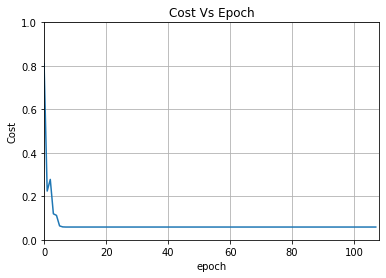

bias: 8.793969849246231 %

Final weight: 
 [ 0.31585681 -0.07307531  0.13857258  0.30474936 -0.23665005  0.17576019
  0.33785563  0.05526941  0.03494087  0.0634953   0.38050211 -0.08043554
  0.19258513  0.25217417 -0.05235134  0.27205924  0.06817959  0.0509708
  0.03503857  0.14658765  0.04263542  0.14933668  0.13945524  0.19984535
  0.22104986  0.1262542   0.35634335 -0.06858039  0.01549069  0.22195529] 

Variance: 13.450292397660817 %

score:  86.54970760233918 %



In [25]:
# load raw data
data_raw, data_raw_index=load_data('breast_cancer_data.csv')

# refine raw data
dt_rf_target, dt_refine, dt_index, dt_rf_row, dt_rf_column= refine_data(data_raw,data_raw_index)

# split raw data into train & test
dt_train, dt_train_target, dt_test, dt_test_target = split_train_test_data(dt_refine,dt_rf_target,0.7)

# scale both train and test into [0,1]
dt_train = scale_data(dt_train)
dt_test = scale_data(dt_test)

# generate general weight
#wt_arr = generate_weight(len(dt_index))
wt_arr = np.array([0.35461069, 0.028625, 0.17593328, 0.28893489, 0.00607685, 0.30147276,
 0.35809594, 0.03850724, 0.26748097, 0.34306035, 0.37540016, 0.0882129,
 0.19569421, 0.22945096, 0.15606727, 0.45092187, 0.17299598, 0.2468449,
 0.19539798, 0.32623075, 0.03366006, 0.24920918, 0.13454076, 0.1561928,
 0.41093688, 0.21628106, 0.42372828, 0.00117224, 0.13944796, 0.36425972,])

# train model
wt_arr, bias = logistic_regression(dt_train,dt_train_target,wt_arr,threshold=0.7,reg_lambda=0,stp=2,epoch=1000,
                                   degree=1,resolution=3, stop_limit=1e-300, plot=True)
print('bias:', bias*100, '%\n')
print('Final weight: \n',wt_arr,'\n')

# cross validation
dt_test_arr = np.array([dt_test])
for ar in dt_test_arr:
    dp=np.dot(ar, wt_arr)

h_x_lst = [sigmoid_sgv(val) for val in dp]
error = calc_error_rate(h_x_lst, dt_test_target, 0.7)

print('Variance:',error*100,'%\n')
print('score: ', (1-error)*100,'%\n')

# 4. Scikit Learn Logistic Regression

In [29]:
# import package 
from sklearn.linear_model import LogisticRegression

# load raw data
data_raw, data_raw_index=load_data('breast_cancer_data.csv')

# refine raw data
dt_rf_target, dt_refine, dt_index, dt_rf_row, dt_rf_column= refine_data(data_raw,data_raw_index)

# split raw data into train & test
dt_train, dt_train_target, dt_test, dt_test_target = split_train_test_data(dt_refine,dt_rf_target,0.7)

# scale both train and test into [0,1]
dt_train = scale_data(dt_train)
dt_test = scale_data(dt_test)

# scikit learn logistic regression
clf = LogisticRegression(random_state=1, solver='lbfgs',multi_class='multinomial').fit(dt_train, dt_train_target)
score = clf.score(dt_test, dt_test_target)

print('scikit learn score:',score*100, '%\n')

scikit learn score: 97.07602339181285 %



# 5. Seperate Code for Debugging

bias: 8.542713567839195 %
Final weight: 
 [ 0.35736942 -0.05893556  0.17244912  0.32356133 -0.18687435  0.11082638
  0.2760221   0.05042464  0.07075363  0.01243453  0.37690768 -0.04592733
  0.18483589  0.24954562 -0.01188635  0.20089253  0.00973181  0.0193924
 -0.01200462  0.08327756  0.07898439  0.17066287  0.16336379  0.21448074
  0.24494273  0.09435122  0.29986926 -0.05212365  0.02616707  0.19603295] 



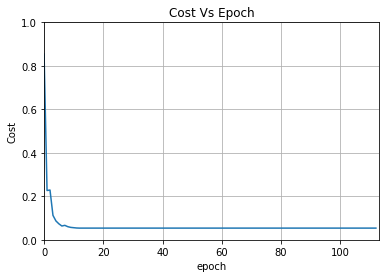

In [27]:
# load raw data
data_raw, data_raw_index=load_data('breast_cancer_data.csv')

# refine raw data
dt_rf_target, dt_refine, dt_index, dt_rf_row, dt_rf_column= refine_data(data_raw,data_raw_index)

# split raw data into train & test
dt_train, dt_train_target, dt_test, dt_test_target = split_train_test_data(dt_refine,dt_rf_target,0.7)

# scale both train and test into [0,1]
dt_train = scale_data(dt_train)
dt_test = scale_data(dt_test)

## train model
# the initial weight is generated from [89]
wt_arr = np.array([0.35461069, 0.028625, 0.17593328, 0.28893489, 0.00607685, 0.30147276,
 0.35809594, 0.03850724, 0.26748097, 0.34306035, 0.37540016, 0.0882129,
 0.19569421, 0.22945096, 0.15606727, 0.45092187, 0.17299598, 0.2468449,
 0.19539798, 0.32623075, 0.03366006, 0.24920918, 0.13454076, 0.1561928,
 0.41093688, 0.21628106, 0.42372828, 0.00117224, 0.13944796, 0.36425972,])

# set up training parameters
threshold = 0.7
reg_lambda=0
stp=2
epoch=1000
degree=1
resolution = 3
stop_limit = 1e-300

stp_limit = 1/pow(10,resolution)
ep=0
epoch_limit=[]
cost_lst=[]

# train the model
while ep<epoch:
    # setup error default
    er=0
    epoch_limit.append(ep)
    
    #calc train data hypothesis value
    h_x_lst = [ sigmoid_sgv(pow(np.dot(wt_arr, np.array(each_dt)),degree)) for each_dt in dt_train]
    
    # calculate error
    #cost= calc_error_rate(h_x_lst, dt_train_target, threshold)
    cost= cost_func(h_x_lst, dt_train_target, threshold)
    cost_lst.append(cost)
    
    # adjust step size
    if ep>0:
        if abs(round(cost_lst[-2],4)-round(cost_lst[-1],4))< stp_limit:
            stp = stp*stp_limit
        if stp< stop_limit:
            break
    
    #update weight values
    h_x_arr = np.array(h_x_lst)
    y_arr = np.array(dt_train_target)
    x_arr = np.array(dt_train)
    
    if reg_lambda > len(x_arr):
        reg_lambda = x_arr
    
    wt_arr = weight_update(wt_arr, h_x_arr, y_arr, x_arr, stp, reg_lambda, threshold)
    
    ep+=1
    
# clculate model training error rate
error_rate = calc_error_rate(h_x_lst, dt_train_target, threshold)
print('bias:', error_rate*100, '%')

print('Final weight: \n',wt_arr,'\n') 

# plot the error rate
plt.plot(epoch_limit, cost_lst)
plt.axis([0, len(epoch_limit), 0, 1])
plt.title('Cost Vs Epoch')
plt.xlabel('epoch')
plt.ylabel('Cost')
plt.grid()
plt.show()


In [28]:
dt_test_arr = np.array([dt_test])

for ar in dt_test_arr:
    dp=np.dot(ar, wt_arr)

h_x_lst = [sigmoid_sgv(val) for val in dp]
error = calc_error_rate(h_x_lst, dt_test_target, threshold)

print('Variance:',error*100,'%\n')

Variance: 8.771929824561402 %

